# $\epsilon$ and $\mu$ Plots

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import S2P_Tools as s2p

In [16]:
d = 0.0127
c=299792458

In [22]:
def calculate45(No_Sample_file, Sample_file_start, Sample_list,Sample_file_end, d):
    frequency_h, s11_mag, s11_phase_h, s21_mag, s21_phase_h = s2p.parameters(No_Sample_file)

    
    for sample in list(Sample_list):
        mu_r_list = []
        epsilon_r_list = []
        current_list = []
        
        for i in range(0,26):
            frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(Sample_file_start+str(sample)+"_"+str(i)+Sample_file_end)
    
            # Subtract 360 from the values that meet the condition
            s11_phase[s11_phase > 0] -= 360
            s11_phase = s11_phase - s11_phase_h
            s21_phase = s21_phase - s21_phase_h

            # Phase correction
            lambda_0 = c / frequency
            phi_0 = 360 * d/lambda_0
            s21_phase = s21_phase - phi_0
            s11_phase = s11_phase - phi_0

            # 45 degree correction
            s11_phase  = s11_phase - 45

            s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
            s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

            # Calculate epsilon and mu
            K = (s11**2-s21**2+1)/(2*s11)

            R = np.zeros_like(K)
            mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
            R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
            R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

            T = (s11+s21-R)/(1-(s11+s21)*R)
            lambda_0 = c / frequency
            A = -((1/(2*np.pi*d)) * np.log(1/T))**2

            # Zero cut-off wavelength
            mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
            epsilon_r = (lambda_0**2 / mu_r ) * (A)
    
            mu_r_list.append(np.average(mu_r))
            epsilon_r_list.append(np.average(epsilon_r))
            current_list.append(i)
        plt.plot(current_list, np.real(mu_r_list), label='$\mathbb{R}(\mu)$ N='+str(sample))
        plt.plot(current_list, (np.imag(mu_r_list)), label='$\mathbb{I}(\mu)$ N='+str(sample))
        plt.plot(current_list, np.real(epsilon_r_list), label='$\mathbb{R}(\epsilon)$ N='+str(sample))
        plt.plot(current_list, np.imag(epsilon_r_list), label='$\mathbb{I}(\epsilon)$ N='+str(sample))
  
    plt.title('Relative Permittivity and Permeability vs Current')
    plt.xlabel('Current (A)')
    plt.ylabel('Relative Permittivity and Permeability')
    plt.legend()
    plt.grid()


<Figure size 640x480 with 0 Axes>

#### L74087BAN4

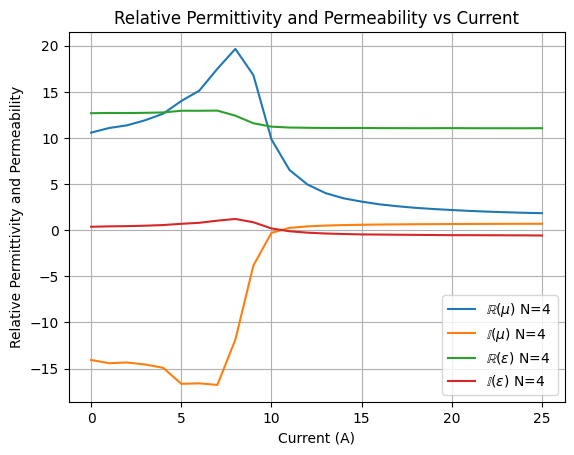

In [23]:
calculate45(r'07112023\NO_SAMPLE_0A_AVG.S2P',r'07112023\L74087BAN',[4],r'A_AVG.S2P',d)


Plot across frequency range at 10A

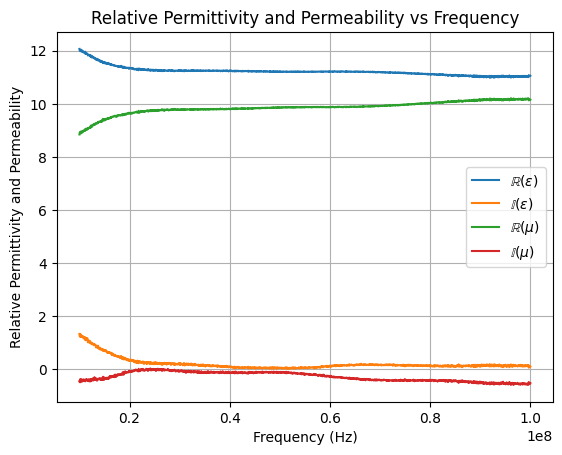

In [38]:
frequency_h, s11_mag, s11_phase_h, s21_mag, s21_phase_h = s2p.parameters(r'07112023\NO_SAMPLE_0A_AVG.S2P') 
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07112023\L74087BAN4_10A_AVG.S2P',d)
 
# Subtract 360 from the values that meet the condition
s11_phase[s11_phase > 0] -= 360
s11_phase = s11_phase - s11_phase_h
s21_phase = s21_phase - s21_phase_h

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase - phi_0
s11_phase = s11_phase - phi_0

# 45 degree correction
s11_phase  = s11_phase - 45

s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

# Calculate epsilon and mu
K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)
lambda_0 = c / frequency
A = -((1/(2*np.pi*d)) * np.log(1/T))**2

# Zero cut-off wavelength
mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
epsilon_r = (lambda_0**2 / mu_r ) * (A)
plt.title('Relative Permittivity and Permeability vs Frequency')
plt.plot(frequency,np.real(epsilon_r), label='$\mathbb{R}(\epsilon)$')
plt.plot(frequency,np.imag(epsilon_r), label='$\mathbb{I}(\epsilon)$')
plt.plot(frequency,np.real(mu_r), label='$\mathbb{R}(\mu)$')
plt.plot(frequency,np.imag(mu_r), label='$\mathbb{I}(\mu)$')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative Permittivity and Permeability')
plt.grid()

##### L74504BBN4

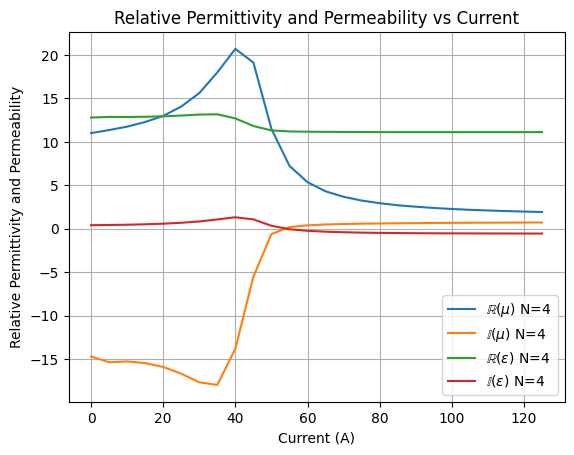

In [19]:
calculate45(r'07112023\NO_SAMPLE_0A_AVG.S2P',r'07112023\L74504BBN',[4],r'A_AVG.S2P',d)

#### L76583BCN

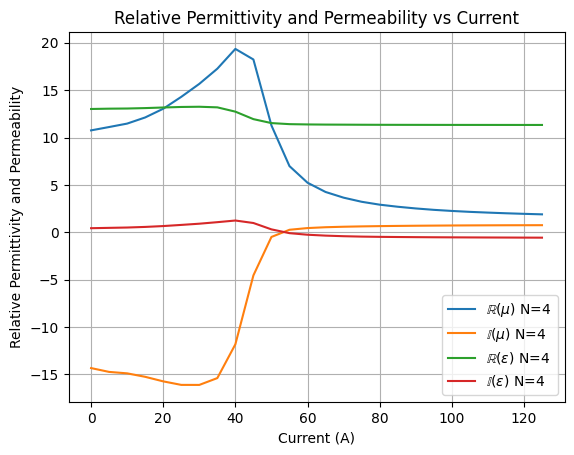

In [20]:
calculate45(r'07112023\NO_SAMPLE_0A_AVG.S2P',r'07112023\L76583BCN',[4],r'A_AVG.S2P',d)